Guernsey Greenhouse gas emissions
==================

The corresponding government report, 'Guernsey Annual Greenhouse Gas Bulletin 2013', can be downloaded from:

http://www.gov.gg/ghg

The Guernsey data is given in 'kilotonnes of CO2 equivalent' units.
This will become important later when we compare it to USA figures.

In [1]:
import requests
json_data = requests.get('http://data.gg/api/1.0/emissions/types.json').text
json_data[:200]

u'[{"Year":1990,"Carbon Dioxide":434.9,"Methane":120.3,"Nitrous Oxide":10.3,"F-Gases":0.0},{"Year":1991,"Carbon Dioxide":492.9,"Methane":121.0,"Nitrous Oxide":10.4,"F-Gases":0.0},{"Year":1992,"Carbon Di'

In [2]:
import pandas
df_gg = pandas.read_json(json_data)
df_gg.set_index('Year', inplace=True)
df_gg['Total'] = df_gg.sum(axis=1, ignore_index=True)
df_gg.head()

,Carbon Dioxide,F-Gases,Methane,Nitrous Oxide,Total
Year,,,,,
1990,434.9,0.0,120.3,10.3,565.5
1991,492.9,0.0,121.0,10.4,624.3
1992,445.6,0.1,121.5,10.4,577.6
1993,461.9,0.6,122.0,10.5,595.0
1994,460.8,1.3,122.5,10.6,595.2


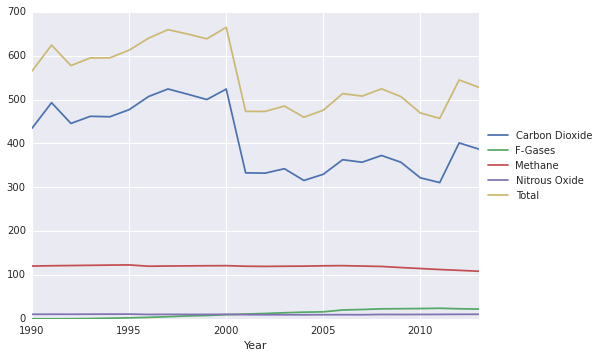

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
df_gg.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

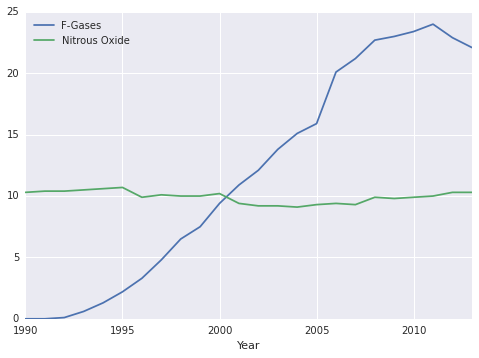

In [4]:
df_gg[['F-Gases', 'Nitrous Oxide']].plot()

Equivalent emissions data from USA
-------------------------------------
Datasets linked from:

http://www3.epa.gov/climatechange/ghgemission

In [5]:
# data retrieved from:
# http://www3.epa.gov/climatechange/ghgemissions/data/1.csv
# units: million metric tons of carbon dioxide equivalents
csv_usa = """
Gas,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Carbon dioxide,5123.695458,5074.075976,5178.988242,5293.136959,5386.180734,5450.53761,5638.726429,5713.893385,5754.492307,5828.461915,6002.42697,5905.567468,5947.335324,5993.409472,6108.583179,6133.968509,6054.151746,6135.198174,5936.987475,5500.602239,5704.530516,5568.890507,5358.276159,5505.178329
Methane,745.4929353,748.9599456,753.471643,743.8166429,758.4807361,750.1709294,750.7784543,731.4040447,720.821712,715.7724875,716.1284674,706.2297701,703.4045316,707.2216388,698.2989351,707.8455598,720.2472434,724.278364,727.9132095,709.4895115,667.1674084,660.9293996,647.6326161,636.3128054
Nitrous oxide,329.8994521,354.8806096,345.5698987,366.5487242,352.811193,371.4638863,393.9003182,376.6597338,358.1497457,353.2562302,335.1812518,353.0502895,346.8844682,334.1744561,355.5936696,355.8863455,353.8170492,377.0433773,364.3089207,356.1003411,360.0624055,371.8764891,365.6082122,355.1938524
Fluorinated gases,101.9660191,92.91025738,97.48090671,98.0324611,101.9805307,122.4410758,134.505293,143.2423966,159.4248055,157.0327825,158.9010166,146.1965984,154.416029,144.6961327,152.1255837,152.5095587,153.9496392,163.261438,162.6550187,156.5444117,167.0499436,174.9504425,173.5809959,176.2703578
Total,6301.053864,6270.826789,6375.51069,6501.534787,6599.453194,6694.613502,6917.910494,6965.19956,6992.888571,7054.523415,7212.637705,7111.044126,7152.040353,7179.5017,7314.601367,7350.209973,7282.165678,7399.781354,7191.864624,6722.736504,6898.810273,6776.646839,6545.097983,6672.955345"""
from StringIO import StringIO
pandas.read_csv(StringIO(csv_usa)).head()

,Gas,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Carbon dioxide,5123.695458,5074.075976,5178.988242,5293.136959,5386.180734,5450.537610,5638.726429,5713.893385,5754.492307,...,6108.583179,6133.968509,6054.151746,6135.198174,5936.987475,5500.602239,5704.530516,5568.890507,5358.276159,5505.178329
1,Methane,745.492935,748.959946,753.471643,743.816643,758.480736,750.170929,750.778454,731.404045,720.821712,...,698.298935,707.845560,720.247243,724.278364,727.913209,709.489512,667.167408,660.929400,647.632616,636.312805
2,Nitrous oxide,329.899452,354.880610,345.569899,366.548724,352.811193,371.463886,393.900318,376.659734,358.149746,...,355.593670,355.886346,353.817049,377.043377,364.308921,356.100341,360.062406,371.876489,365.608212,355.193852
3,Fluorinated gases,101.966019,92.910257,97.480907,98.032461,101.980531,122.441076,134.505293,143.242397,159.424805,...,152.125584,152.509559,153.949639,163.261438,162.655019,156.544412,167.049944,174.950443,173.580996,176.270358
4,Total,6301.053864,6270.826789,6375.510690,6501.534787,6599.453194,6694.613502,6917.910494,6965.199560,6992.888571,...,7314.601367,7350.209973,7282.165678,7399.781354,7191.864624,6722.736504,6898.810273,6776.646839,6545.097983,6672.955345


In [6]:
# transpose the data so that each year is a row rather than a column
df_usa = pandas.read_csv(StringIO(csv_usa)).transpose()
# remove the default index
df_usa.reset_index(inplace=True)
# rename the columns to match the data.gg names
df_usa.columns = ['Year', 'Carbon Dioxide', 'Methane', 'Nitrous Oxide', 'F-Gases', 'Total']
# remove the first data row, which is actually the column headers
df_usa.drop(0, inplace=True)
# set the 'Year' column to be the index column
df_usa.set_index('Year', inplace=True)
df_usa.head()

,Carbon Dioxide,Methane,Nitrous Oxide,F-Gases,Total
Year,,,,,
1990,5123.695,745.4929,329.8995,101.966,6301.054
1991,5074.076,748.9599,354.8806,92.91026,6270.827
1992,5178.988,753.4716,345.5699,97.48091,6375.511
1993,5293.137,743.8166,366.5487,98.03246,6501.535
1994,5386.181,758.4807,352.8112,101.9805,6599.453


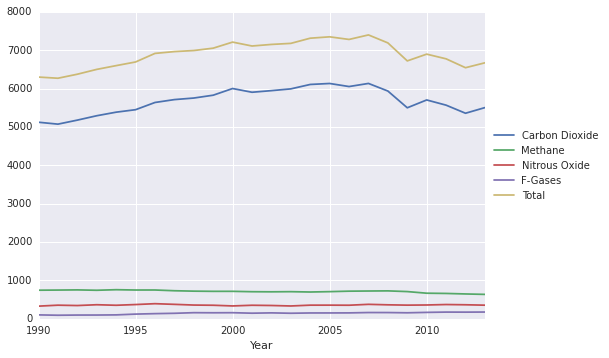

In [7]:
df_usa.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

The USA data is in *million metric tons*

Comparing Guernsey emissions to USA, _per capita_
==========================

In [8]:
population_usa = 318900000
# USA figures are in _million_ tonnes
df_usa_pc = df_usa * 1000000 / population_usa
df_usa_pc['Country'] = 'USA'
df_usa_pc.head()

,Carbon Dioxide,Methane,Nitrous Oxide,F-Gases,Total,Country
Year,,,,,,
1990,16.06678,2.337701,1.034492,0.3197429,19.75871,USA
1991,15.91118,2.348573,1.112827,0.2913461,19.66393,USA
1992,16.24016,2.362721,1.083631,0.3056786,19.99219,USA
1993,16.59811,2.332445,1.149416,0.3074082,20.38738,USA
1994,16.88987,2.378428,1.106338,0.3197884,20.69443,USA


In [9]:
population_gg = 65849
# Guernsey figures are in _thousand_ tonnes
df_gg_pc = df_gg * 1000 / population_gg
df_gg_pc['Country'] = 'Guernsey'
df_gg_pc.head()

,Carbon Dioxide,F-Gases,Methane,Nitrous Oxide,Total,Country
Year,,,,,,
1990,6.604504,0.000000,1.826907,0.156418,8.587830,Guernsey
1991,7.485307,0.000000,1.837537,0.157937,9.480782,Guernsey
1992,6.766997,0.001519,1.845131,0.157937,8.771583,Guernsey
1993,7.014533,0.009112,1.852724,0.159456,9.035824,Guernsey
1994,6.997828,0.019742,1.860317,0.160974,9.038862,Guernsey


In [10]:
df_all_pc = pandas.concat([df_usa_pc, df_gg_pc])

Carbon dioxide
---------------

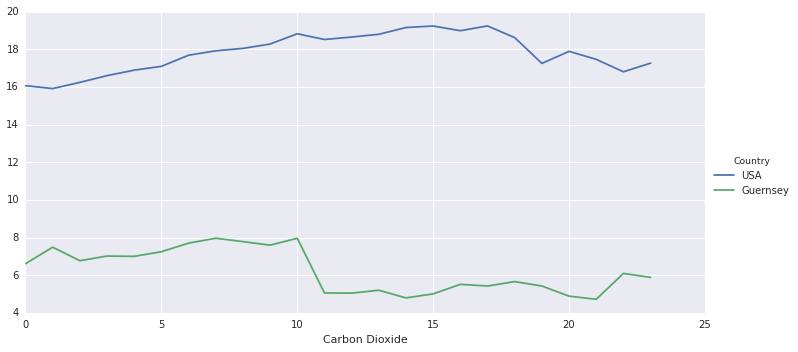

In [11]:
grid = seaborn.FacetGrid(df_all_pc, hue='Country', size=5, aspect=2)
grid.map(plt.plot, 'Carbon Dioxide').add_legend()

Fluorinated gases
------------------

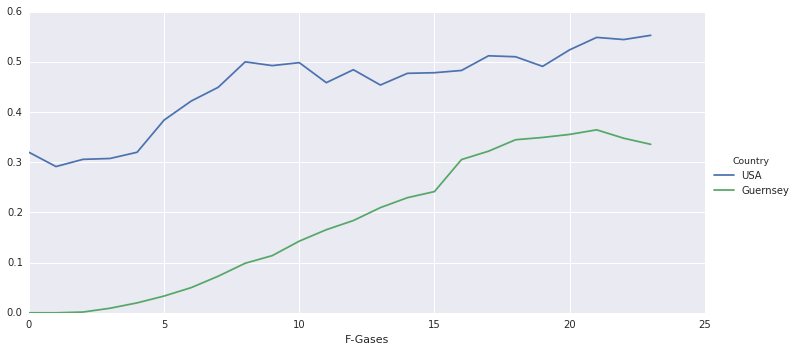

In [12]:
grid = seaborn.FacetGrid(df_all_pc, hue='Country', size=5, aspect=2)
grid.map(plt.plot, 'F-Gases').add_legend()

Methane
-------

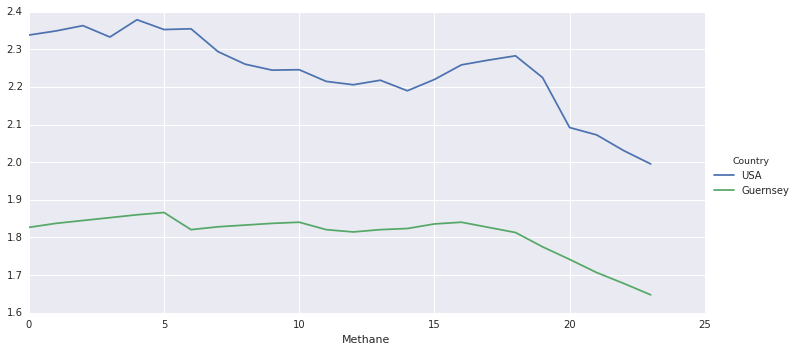

In [13]:
grid = seaborn.FacetGrid(df_all_pc, hue='Country', size=5, aspect=2)
grid.map(plt.plot, 'Methane').add_legend()

Nitrous oxide
--------------

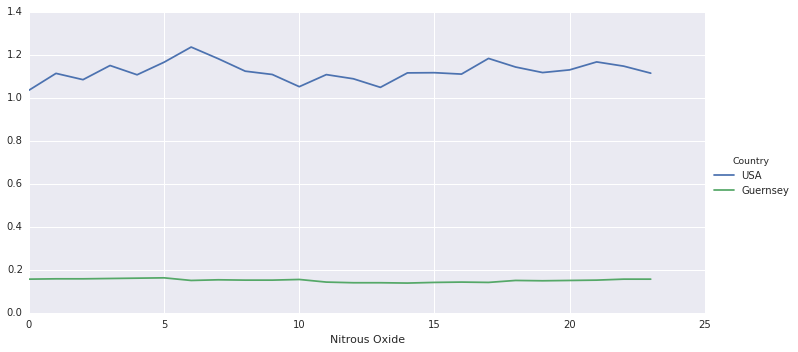

In [14]:
grid = seaborn.FacetGrid(df_all_pc, hue='Country', size=5, aspect=2)
grid.map(plt.plot, 'Nitrous Oxide').add_legend()